# Statistics and Fitting in a Jupyter Notebook
## Introduction

In this Jupyter notebook the basic statistic functions, linear and non-linear fits are demonstrated.

## Imported Packages

In the following code cell some Python libraries for calculation, fitting, data import and results display are imported. The exact purpose of the libraries is indicated in the code cell as a comment after the hashtag #. Note that sometimes only certain modules from the packages are imported.

In [1]:
import numpy as np                                # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im 
                                                  # displaying LaTeX code in code cells

## Definition of the Plot Parameters

In [2]:
# figure size
height_cm = 15
width_cm = 20
height_inch = height_cm/2.54
width_inch = width_cm/2.54

# text font and size for figures
rcParams.update({'font.size': 22})
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma'] #other font styles possible
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
legendfontsize = 12
titlesize = 18

# axes tick size
ticksize = 100

## Definition of the Data File Path

In [3]:
datapath = './'  # Change for your system.

## Data Import

The experimental data are provided as ASCII files with one column. In the following code cell the data files are imported using pandas dataframes and are assigned to list.
File names are:
1. Statistics
      - numbers_4.dat (series of numbers)
      - w_4.dat       (statistical weights)
      - linear_1.dat  (series of number pairs)
2. non-linear fitting
      - RCL_amp.dat   (three columns: frequency (Hz), $U_R$ (mV) and $U$ (mV))

In [4]:
### Statistics data

## Assign more convenient variables and work with pandas dataframes.
stat4 = pd.read_table(datapath+'numbers_4.dat')                               
weight4 = pd.read_table(datapath+'w_4.dat')
lin1 = pd.read_table(datapath+'linear_1.dat')

### non-linear fitting

## RLC - assign more convenient variables and work with pandas dataframes
RLC_amp = pd.read_table(datapath+'RCL_amp.dat')                             # transfer function RCL series circuit

## Calculation of basic parameters from descriptive statistics: Average, standard deviation, variance, standrad deviation of the mean

In [5]:
# Number of data values
l4 = len(stat4)
# Average value
ave4 = np.average(stat4)
# Weighted average
wave4 = np.average(stat4,weights=weight4)
# Standard deviation
std4 = np.std(stat4,ddof = 1)  #ddof = 1 reduces the number of degrees of freedom by 1, i.e. the quadratic some is normalized by (N-ddof)
# Variance
var4 = np.var(stat4,ddof = 1)
# Standard deviation of the mean
stdm4 = std4/np.sqrt(l4)
# Displaying the values
dy(Lx(r'$N$ = %i, Average = %0.5f, Standard deviation = %0.5f, Standard deviation of the mean = %0.5f, Variance = %0.5f' % (l4,ave4,std4,stdm4,var4)))
dy(Lx(r'Example for weighted average: $N$ = 10000, Average = %0.5f, Weighted average = %0.5f' % (ave4,wave4)))

C:\Users\edhar\AppData\Local\Temp\ipykernel_4224\4018955212.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dy(Lx(r'$N$ = %i, Average = %0.5f, Standard deviation = %0.5f, Standard deviation of the mean = %0.5f, Variance = %0.5f' % (l4,ave4,std4,stdm4,var4)))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Linear Fits

In [6]:
### FIT FUNCTIONS

def linear(x, a, b):
  return a*x+b

x = lin1['x']
y = lin1['y']

# fit_linear[0][0:1] contains the values of the fit parameters a and b, 
# fit_linear[1][0:1][0:1] the covariance matrix with the variance of the fit parameters as diagonal elements.
fit_linear = curve_fit(linear, x, y)

print('Fit returns values for fitting parameters and the covariance matrix, see array below. The diagonal matrix elements are the variances of the fitting parameters.')
print(fit_linear)  
dy(Lx('$a =$ %.3f, $b =$ %.3f' % (fit_linear[0][0],fit_linear[0][1])))
dy(Lx('$u(a) =$ %.1e, $u(b) =$ %.1e' % (np.sqrt(fit_linear[1][0][0]),np.sqrt(fit_linear[1][1][1]))))
dy(Lx('$cov(a,b) =$ %.3f' % (fit_linear[1][0][1]/np.sqrt(fit_linear[1][0][0]*fit_linear[1][1][1]))))
dy(Lx('With correct number of decimals:'))
dy(Lx('$a \pm u(a) = $ %.4f $\pm$ %.0e' % (fit_linear[0][0],np.sqrt(fit_linear[1][0][0]))))
dy(Lx('$b \pm u(b) = $ %.2f $\pm$ %.0e' % (fit_linear[0][1],np.sqrt(fit_linear[1][1][1]))))

Fit returns values for fitting parameters and the covariance matrix, see array below. The diagonal matrix elements are the variances of the fitting parameters.
(array([ 0.11082955, -2.98649178]), array([[ 9.10568993e-08, -4.09756050e-06],
       [-4.09756050e-06,  2.77875309e-04]]))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Plotting of data and linear fit

<IPython.core.display.Latex object>

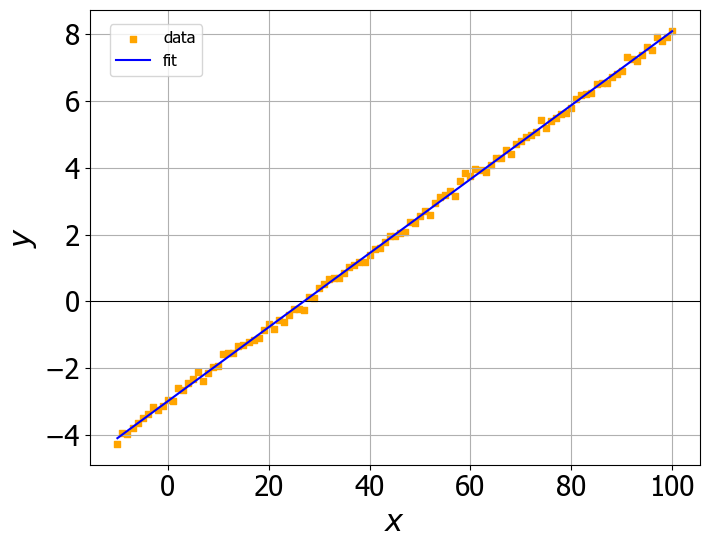

In [7]:
### PLOTS

## linear
fig1, ax1 = plt.subplots()
fig1.set_figheight(height_inch)
fig1.set_figwidth(width_inch)

ax1.grid('both')
ax1.axhline(0, linewidth=0.75, color='black')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
#ax1.set_ylim(-20,90)
#ax1.set_yticks(np.arange(-90,91,30))

# figure caption
dy(Lx(r'$Figure\, 1$: Linear scatter data. Solid line is a linear fit to the data.'))

#RC phase data and fit
ax1.scatter(lin1['x'], lin1['y'],marker = 's', color = 'orange', s = 25, label = 'data')
ax1.plot(lin1['x'], linear(lin1['x'], fit_linear[0][0], fit_linear[0][1]), color = 'blue', linewidth = 1.5, label = 'fit')
fig1.legend(bbox_to_anchor = (0.14, 0.87), loc = 'upper left', fontsize = legendfontsize)
plt.show()

## Non-linear Fit



In [8]:
### FIT FUNCTIONS

def amp_rcl(f, f0, delta, rc):
  w0 = 2*np.pi*f0
  w = 2*np.pi*f
  return 1/(1+rc)*2*delta*w/(4*delta**2*w**2+(w**2-w0**2)**2)**0.5


### FITS

# fit_amp_rcl[0][0:2] contains the values of the fit parameters f0, delta and rc,
# fit_amp_rclRC[1][0:2][0:2] the covariance matrix with the variance of the fit parameters as diagonal elements.
fit_amp_rcl = curve_fit(amp_rcl, RLC_amp['f(Hz)'], np.abs(RLC_amp['UR (mV)']/RLC_amp['U (mV)']), p0 = (4000.,30000.,1.))

# LaTeX code to display the fitting results
dy(Lx(r'$\underline{\rm Fitting\, results}$'))
dy(Lx(r'from RCL amp: $f_0 =$ (%0.0f $\pm$ %0.0f) Hz, $\delta =$ (%0.0f $\pm$ %0.0f) s$^{-1}$,$R_C/R =$ %0.3f $\pm$ %0.3f' % 
      (fit_amp_rcl[0][0],np.sqrt(fit_amp_rcl[1][0][0]),fit_amp_rcl[0][1],np.sqrt(fit_amp_rcl[1][1][1]), \
       fit_amp_rcl[0][2],np.sqrt(fit_amp_rcl[1][2][2]))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Plotting of data and non-linear fits

<IPython.core.display.Latex object>

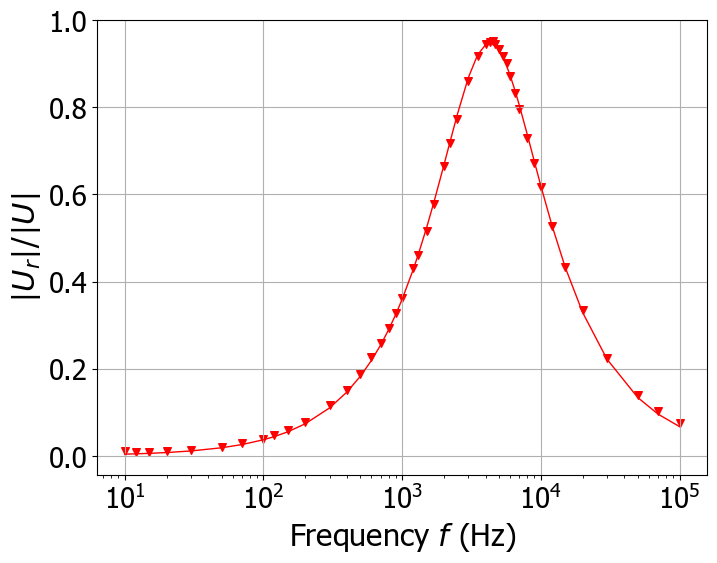

In [9]:
### PLOTS

## amp plot and fits
fig3, ax3 = plt.subplots()
fig3.set_figheight(height_inch)
fig3.set_figwidth(width_inch)

ax3.semilogx()
ax3.grid('both')
ax3.set_xlabel('Frequency $f$ (Hz)')
ax3.set_ylabel(r'|$U_r$|/|$U$|')

# figure caption
dy(Lx(r'Transfer function $|U_R|/|U|$ of the RCL-circuit. Solid line is fit to the data.'))

#RCL amp data
ax3.scatter(RLC_amp['f(Hz)'], np.abs(RLC_amp['UR (mV)']/RLC_amp['U (mV)']),
            marker = 'v', color = 'red', s = 30, label = 'RCL')

#RCL amp fit
ax3.plot(RLC_amp['f(Hz)'], amp_rcl(RLC_amp['f(Hz)'], fit_amp_rcl[0][0], fit_amp_rcl[0][1], fit_amp_rcl[0][2]),
         color = 'red', linewidth = 1.0, label = 'fit RCL')
plt.show()